# 9.사이킷런으로 구현해 보는 머신러닝

# 9-6. 사이킷런의 주요 모듈 (2) 회귀 모델 실습

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r= np.random.RandomState(10)
# numpy.random.RandomState는 class명으로
# 랜덤넘버 생성기인 랜덤함수들을 포함하는 클래스라고 할 수 있다.
# RandomState는 다양한 확률분포측면에 수 많은 랜덤넘버 생성기들을 가지고 있다.
# ex) numpy.random.uniform(균등분포에서 변수 추출),
#    numpy.random.nomal(정규분포에서 변수 추출), 등

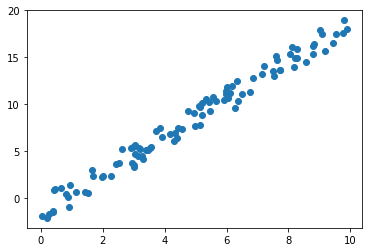

In [5]:
x = 10 * r.rand(100)
y = 2 * x -3 * r.rand(100)
plt.scatter(x,y)

In [6]:
x.shape

(100,)

In [38]:
x

array([7.71320643, 0.20751949, 6.33648235, 7.48803883, 4.98507012,
       2.24796646, 1.98062865, 7.60530712, 1.69110837, 0.88339814,
       6.85359818, 9.53393346, 0.03948266, 5.12192263, 8.12620962,
       6.12526067, 7.21755317, 2.91876068, 9.17774123, 7.14575783,
       5.42544368, 1.42170048, 3.7334076 , 6.74133615, 4.41833174,
       4.34013993, 6.17766978, 5.13138243, 6.50397182, 6.01038953,
       8.05223197, 5.21647152, 9.08648881, 3.19236089, 0.90459349,
       3.00700057, 1.13984362, 8.28681326, 0.46896319, 6.26287148,
       5.47586156, 8.19286996, 1.9894754 , 8.56850302, 3.51652639,
       7.54647692, 2.95961707, 8.8393648 , 3.25511638, 1.65015898,
       3.92529244, 0.93460375, 8.21105658, 1.5115202 , 3.84114449,
       9.44260712, 9.87625475, 4.56304547, 8.26122844, 2.51374134,
       5.97371648, 9.0283176 , 5.34557949, 5.90201363, 0.39281767,
       3.57181759, 0.7961309 , 3.05459918, 3.30719312, 7.73830296,
       0.39959209, 4.29492178, 3.14926872, 6.36491143, 3.46347

In [9]:
y.shape

(100,)

In [12]:
# 모델 만들기
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [13]:
# 모델 훈련시키기
# x가 ndarray라서 에러가 발생하므로 x -> X로 변경하면서 행렬모양으로 변형시켜줘야 함.
X = x.reshape(100,1)

In [17]:
# X를 fit의 인자로 넣어줌.
model.fit(X,y)

LinearRegression()

In [20]:
# 새로운 데이터를 넣고 예측하기
x_new = np.linspace(-1, 11, 100)  # linspace(start, stop, num(개수))로 사용되며 지정한 숫자사이에 일정한 간격으로 원하는 개수만큼 숫자를 생성
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

In [21]:
# 모델의 성능 평가
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y, y_new))

In [23]:
error

9.299028215052264

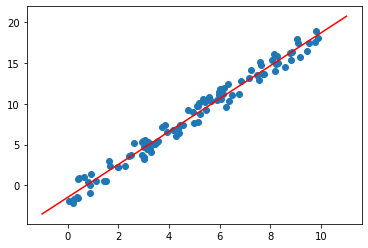

In [28]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

# 10.9 함수의 역할

In [29]:
import numpy as np

def linear_transformation(X, A):   # X벡터를 A좌표로 변형하는 함수 생성
    transformed_vector = np.matmul(X, A)
    return transformed_vector

In [33]:
X = np.array([-1,  2])
X1 =[-1, 2]

print(X, X1)

[-1  2] [-1, 2]


In [36]:
A =np.array( [[1,-2], 
             [3, 0]])

A1 = [[1, 3],[-2, 0]]

print(A, A1)
print(type(A), type(A1))
print(np.array(A1))


[[ 1 -2]
 [ 3  0]] [[1, 3], [-2, 0]]
<class 'numpy.ndarray'> <class 'list'>
[[ 1  3]
 [-2  0]]


# 11.3 텍스트데이터 -문자열

In [60]:
import re

In [61]:
#- 이메일(알파벳, 숫자, 기호)
text = "My e-mail adress is doingharu@aiffel.com, and tomorrow@aiffel.com"
pattern = re.compile("[0-9a-zA-Z]+@[0-9a-z]+\.[0-9a-z]+")
pattern.findall(text)

['doingharu@aiffel.com', 'tomorrow@aiffel.com']

In [115]:
#- 전화번호(숫자, 기호)
phonenumber = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
phone = phonenumber.search('This is my phone number 010-111-1111')

if phone is not None:
    print(phone.group())
print('------')
phone = phonenumber.match('This is my phone number 010-111-1111')
if phone:
    print(phone.group())

010-111-1111
------


In [107]:
type(phone)

re.Match

In [109]:
if phone:
    print('AA')

AA


In [119]:
bool(phone) == True

False

In [118]:
phone == False

False

In [111]:
A = None

In [112]:
B = NULL

NameError: name 'NULL' is not defined

# 11-9 xml 파일 불러오기

In [ ]:
from bs4 import BeautifulSoup
with open("books.xml", "r", encoding='utf8') as f:
    booksxml = f.read() 
    #- 파일을 문자열로 읽기
 
soup = BeautifulSoup(booksxml,'lxml') 
#- BeautifulSoup 객체 생성 : lxml parser를 이용해 데이터 분석

for title in soup.find_all('title'): 
#-  태그를 찾는 find_all 함수 이용
    print(title.get_text())

In [1]:
from bs4 import BeautifulSoup

In [4]:
with open("/home/hyunyee/books.xml", "r", encoding='utf8') as f:
    booksxml = f.read()

In [7]:
soup = BeautifulSoup(booksxml, 'lxml')

In [10]:
for title in soup.find_all('title'):
    print(title.get_text())

XML Developer's Guide
Midnight Rain
Maeve Ascendant
Oberon's Legacy
The Sundered Grail
Lover Birds
Splish Splash
Creepy Crawlies
Paradox Lost
Microsoft .NET: The Programming Bible
MSXML3: A Comprehensive Guide
Visual Studio 7: A Comprehensive Guide


# 12-3 데이터시각화- 막대그래프

Text(0.5, 1.0, "Yuna's Test Result")

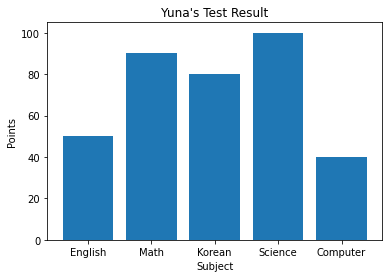

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#그래프 데이터 
subject = ['English', 'Math', 'Korean', 'Science', 'Computer']
points = [50, 90, 80, 100, 40]

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
ax1.bar(subject, points)

# 라벨, 타이틀 달기
plt.xlabel('Subject')
plt.ylabel('Points')
plt.title("Yuna's Test Result")

# 12-5. 간단한 그래프 그리기 (3) plot 사용법 상세

In [14]:
import numpy as np
x = np.linspace(0, 10, 100) # linspace(start, stop, num(개수))로 사용되며 지정한 숫자사이에 일정한 간격으로 원하는 개수만큼 숫자를 생성

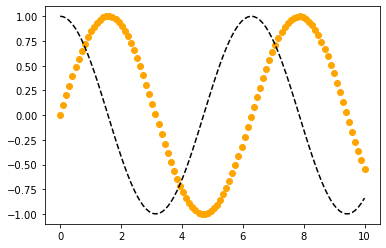

In [16]:
plt.plot(x, np.sin(x), 'o', color='orange')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

<AxesSubplot:>

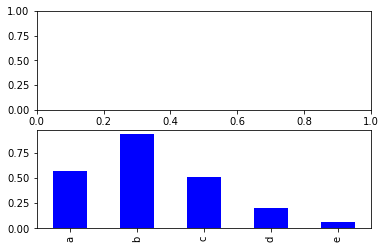

In [26]:
import numpy as np
import pandas as pd

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)  # ax=axes[0]: 그래프의 위치 2개중에서 첫번째에 그려라 라는 뜻
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)

<AxesSubplot:>

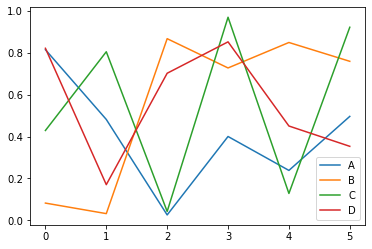

In [31]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))  # 6개의 행과 4개의 컬럼으로 된 데이터프레임을 만들어라
df.plot(kind='line')

In [32]:
df

,A,B,C,D
0,0.814211,0.082510,0.428840,0.820886
1,0.481481,0.032244,0.804405,0.170454
2,0.026070,0.866759,0.042686,0.701818
3,0.400153,0.727096,0.968997,0.851604
4,0.238349,0.848589,0.128497,0.450173
5,0.496029,0.758773,0.921263,0.353269
